# 6-5 Unsupervised Machine Learning: Clustering

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Defining the path and loading data

In [5]:
path = r'C:\Users\tiffk\Chronic_Illness'

In [7]:
# Importing datasets
df_merged = pd.read_csv(os.path.join(path, 'Data', 'df_merged_cleaned.csv'), low_memory=False, index_col = False)


**Checking data**

In [26]:
df_merged.head(5)

,Unnamed: 0.1,Unnamed: 0,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,pain_count,symptom,condition,weather,precipitation_x,severity,Age_1,precipitation_y_checked2
0,0,0,9070,0,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,0,0,NaN,Ulcerative colitis,NaN,0,0,34.04953,NaN
1,1,1,22737,32,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,0,0,NaN,Ulcerative colitis,NaN,0,0,32.00000,NaN
2,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,1,Joint stiffness,pain in left upper arm felt like i was getting...,NaN,0,4,2.00000,0.0031
3,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,1,Joint stiffness,pain in left upper arm felt like i was getting...,NaN,0,4,2.00000,0.0031
4,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,1,Joint stiffness,pain in left upper arm felt like i was getting...,NaN,0,4,2.00000,0.0031


In [45]:
df_merged = df_merged.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [139]:
df_merged.describe()

,user_id,age,checkin_date,has_arthritis,pain_count,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year
count,3.729479e+06,3.729479e+06,3729479,3.729479e+06,3.729479e+06,3.729479e+06,3.729479e+06,308302.000000,308446.000000,308446.000000,308446.000000,308446.000000,308446.000000,3.729479e+06,3.729479e+06
mean,2.163927e+04,3.327156e+01,2016-02-20 23:03:23.704484608,1.560497e-01,1.228849e+00,1.012510e+02,3.558410e+01,0.002824,72.830343,44.043797,60.107633,1017.309523,16.063836,6.669846e+00,2.015627e+03
min,3.900000e+01,0.000000e+00,2015-05-24 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,21.000000,-1.000000,14.000000,986.000000,3.000000,1.000000e+00,2.015000e+03
25%,1.034400e+04,2.600000e+01,2015-08-09 00:00:00,0.000000e+00,1.000000e+00,0.000000e+00,2.800000e+01,0.000100,65.000000,39.000000,53.000000,1011.000000,12.000000,5.000000e+00,2.015000e+03
50%,2.387500e+04,3.300000e+01,2015-12-29 00:00:00,0.000000e+00,1.000000e+00,1.000000e+00,3.400000e+01,0.001000,75.000000,43.000000,59.000000,1017.000000,15.000000,7.000000e+00,2.015000e+03
75%,3.233800e+04,4.200000e+01,2016-07-02 00:00:00,0.000000e+00,2.000000e+00,3.000000e+00,4.200000e+01,0.002700,82.000000,49.000000,63.000000,1025.000000,20.000000,9.000000e+00,2.016000e+03
max,4.226700e+04,9.000000e+01,2019-09-29 00:00:00,1.000000e+00,2.000000e+00,2.000200e+07,9.000000e+01,0.081200,96.000000,81.000000,97.000000,1040.000000,34.000000,1.200000e+01,2.019000e+03
std,1.315659e+04,1.329557e+01,NaN,3.629025e-01,5.340560e-01,4.272643e+04,9.806479e+00,0.006230,11.931911,11.910604,13.854143,9.608423,6.300794,2.843768e+00,7.575016e-01


In [137]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729479 entries, 0 to 3729478
Data columns (total 24 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_id          int64         
 1   age              int64         
 2   sex              object        
 3   country          object        
 4   checkin_date     datetime64[ns]
 5   trackable_id     object        
 6   trackable_type   object        
 7   trackable_name   object        
 8   trackable_value  object        
 9   has_arthritis    int64         
 10  pain_count       int64         
 11  symptom          object        
 12  condition        object        
 13  weather          object        
 14  severity         float64       
 15  Age              int64         
 16  precipitation    float64       
 17  humidity         float64       
 18  min_temp         float64       
 19  max_temp         float64       
 20  pressure         float64       
 21  temp_change      float64       

**Create  month and year column from checkin_date**

In [31]:
df_merged['checkin_date'] = pd.to_datetime(df_merged['checkin_date'])  # Convert 'checkin_date' to datetime if not already
df_merged['month'] = df_merged['checkin_date'].dt.month  # Create a new column 'month' with the month extracted from 'checkin_date'

In [40]:
df_merged['year'] = df_merged['checkin_date'].dt.year  # Create a new column 'year' with the year extracted from 'checkin_date'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_10508\1581394059.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])


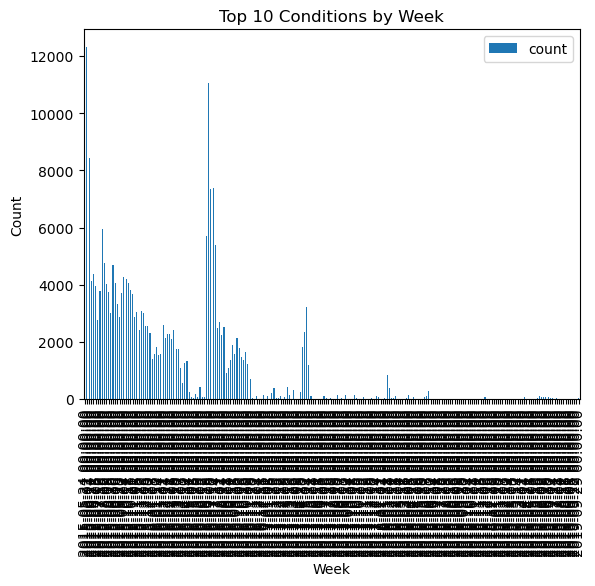

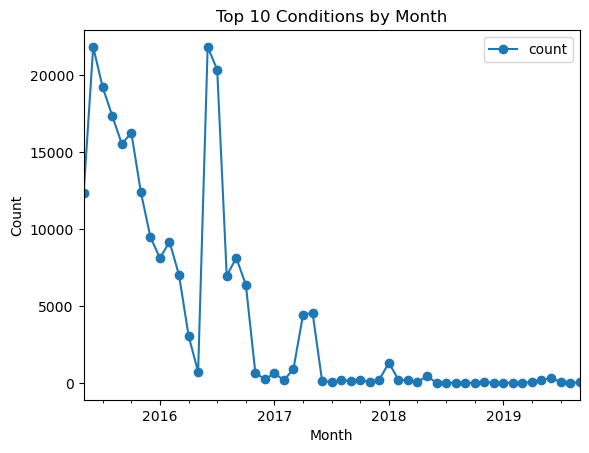

In [11]:
# Group data by check-in date and country, and count the occurrences of each condition
grouped_data = df_merged.groupby(['checkin_date', 'country', 'condition']).size().reset_index(name='count')

# Find the 10 most common conditions
top_10_conditions = grouped_data.groupby('condition')['count'].sum().nlargest(10).index

# Filter the data for the top 10 conditions
top_10_data = grouped_data[grouped_data['condition'].isin(top_10_conditions)]

# Create a bar chart of the counts of the top 10 conditions by week
top_10_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])
top_10_data.set_index('checkin_date', inplace=True)
top_10_data.resample('W').sum().plot(kind='bar', stacked=True)
plt.title('Top 10 Conditions by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()

# Create a line chart of the counts of the top 10 conditions by month
top_10_data.resample('M').sum().plot(kind='line', marker='o')
plt.title('Top 10 Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Create a numerical data frame by dropping string and non analyzed columns

In [141]:
# Create a numerical data frame by dropping string and non analyzed columns
# Assuming df_merged is the original dataframe
df_num = df_merged.drop(['user_id', 'sex', 'country', 'trackable_id', 'trackable_type', 'trackable_name', 'trackable_value', 'symptom', 'condition', 'weather'], axis=1)

In [180]:
df_num.shape

(3729479, 13)

In [178]:
# Count the number of NaN values in each column
nan_count = df_num.isna().sum()
print(nan_count)

age                    0
has_arthritis          0
pain_count             0
severity               0
Age                    0
precipitation    3421177
humidity         3421033
min_temp         3421033
max_temp         3421033
pressure         3421033
temp_change      3421033
month                  0
year                   0
dtype: int64


In [182]:
# Exclude rows with NaN values
df_num_cleaned = df_num.dropna()

## The Elbow Technique

In [184]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [186]:
# Convert the data types in df_num to float64, excluding datetime columns
#df_num = df_num.select_dtypes(exclude=['datetime']).astype('float64')

# Now calculate the score
score = [kmeans[i].fit(df_num_cleaned).score(df_num_cleaned) for i in range(len(kmeans))]
score

C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\clust

[-5779363417.267106,
 -304474087.61433864,
 -233724413.5315867,
 -187179301.29552415,
 -158589085.243624,
 -138545240.29168394,
 -122847302.07505006,
 -114378947.05192399,
 -108572705.61790489]

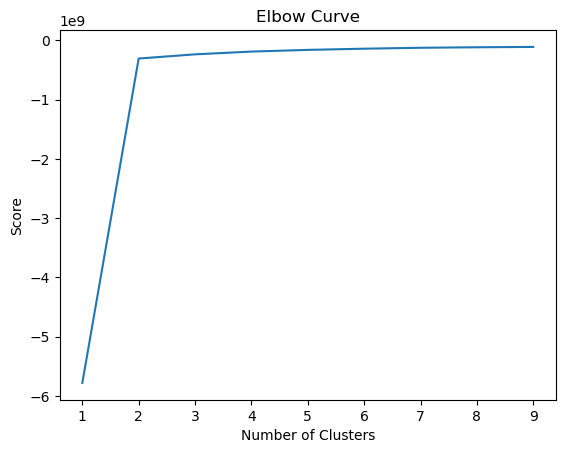

In [189]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## K Means Clustering

In [191]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 2) 

In [193]:
# Fit the k-means object to the data.
kmeans.fit(df_num_cleaned)

C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [201]:
df_num_cleaned.loc[:, 'clusters'] = kmeans.fit_predict(df_num_cleaned)

C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [199]:
df_num_cleaned['clusters'] = kmeans.fit_predict(df_num_cleaned)

C:\Users\tiffk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tiffk\AppData\Local\Temp\ipykernel_10508\3805021143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_cleaned['clusters'] = kmeans.fit_predict(df_num_cleaned)


In [207]:
df_num_cleaned.head()

,age,has_arthritis,pain_count,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change,month,year,clusters
2,2.0,0.0,1.0,4.0,2.0,0.0031,66.0,54.0,69.0,1012.0,15.0,4.0,2017.0,0
3,2.0,0.0,1.0,4.0,2.0,0.0031,66.0,54.0,69.0,1012.0,15.0,4.0,2017.0,0
4,2.0,0.0,1.0,4.0,2.0,0.0031,66.0,54.0,69.0,1012.0,15.0,4.0,2017.0,0
5,2.0,0.0,1.0,4.0,2.0,0.0031,66.0,54.0,69.0,1012.0,15.0,4.0,2017.0,0
6,2.0,0.0,1.0,4.0,2.0,0.0031,66.0,54.0,69.0,1012.0,15.0,4.0,2017.0,0


In [209]:
df_num_cleaned['clusters'].value_counts()

clusters
0    302844
1      5458
Name: count, dtype: int64

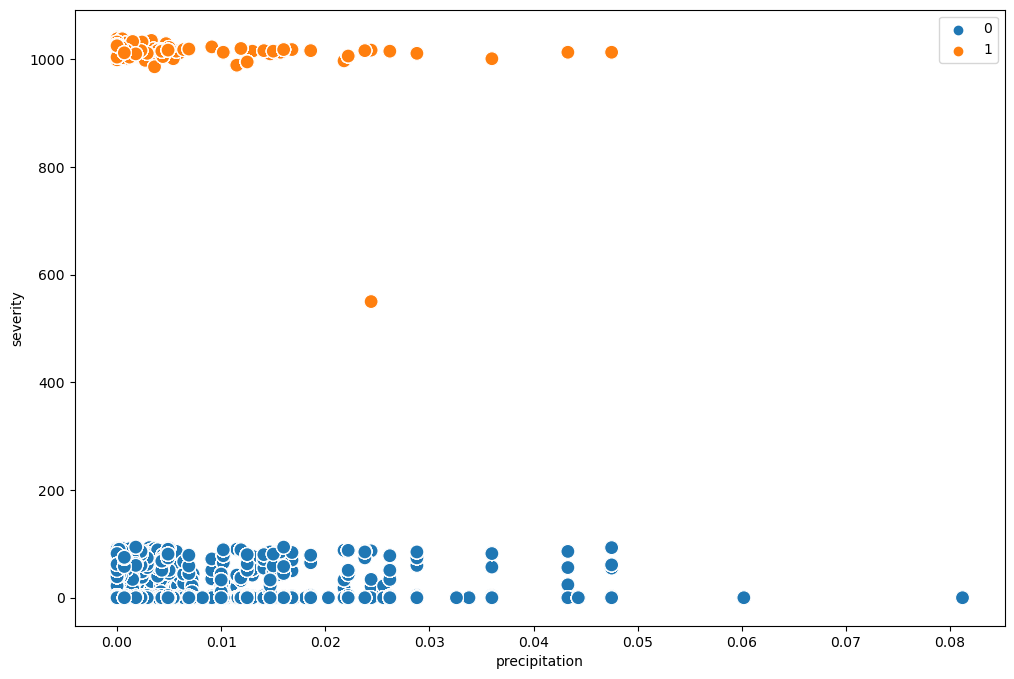

In [211]:
# Plot the clusters for the severity and precipitation variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_cleaned['precipitation'], y=df_num_cleaned['severity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('precipitation') # Label x-axis.
plt.ylabel('severity') # Label y-axis.
plt.show()

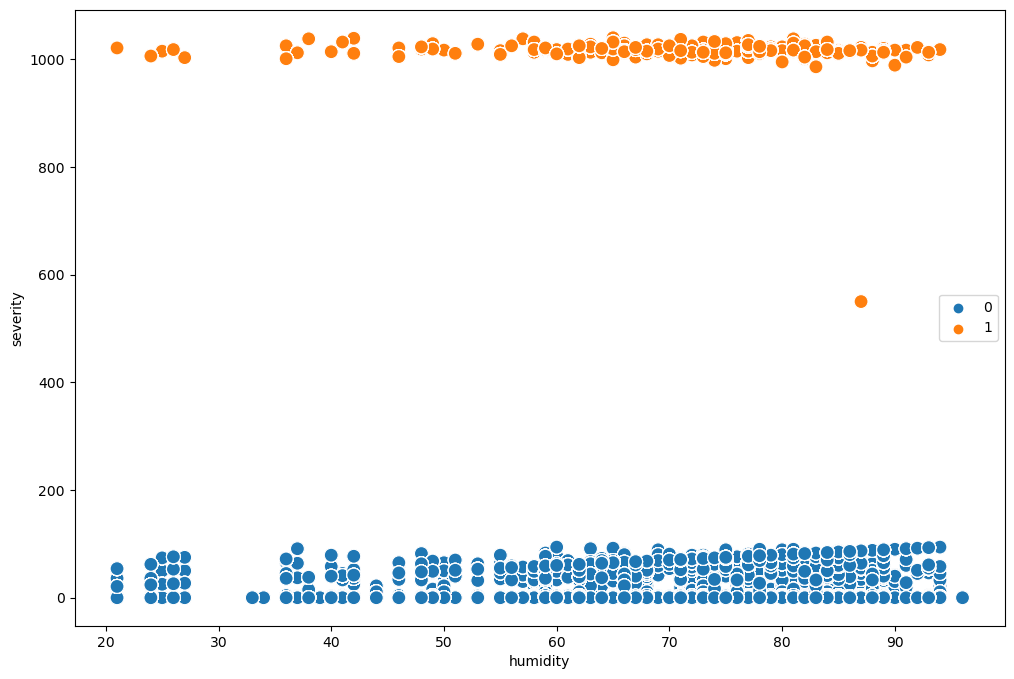

In [214]:
# Plot the clusters for the severity and precipitation variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_cleaned['humidity'], y=df_num_cleaned['severity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('humidity') # Label x-axis.
plt.ylabel('severity') # Label y-axis.
plt.show()

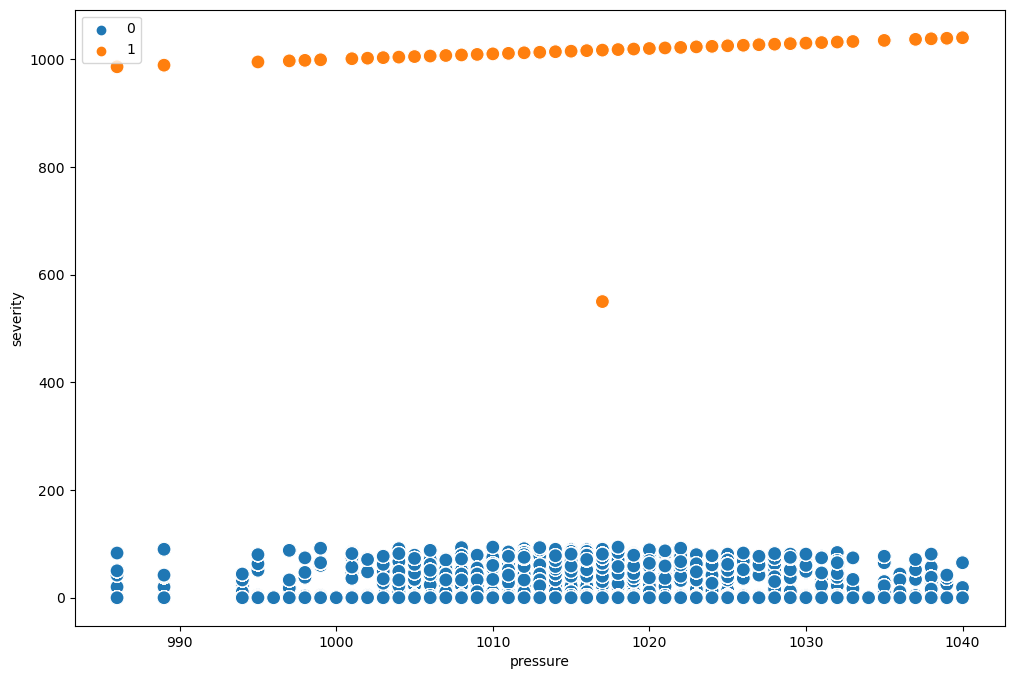

In [218]:
# Plot the clusters for the severity and pressure variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_cleaned['pressure'], y=df_num_cleaned['severity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('pressure') # Label x-axis.
plt.ylabel('severity') # Label y-axis.
plt.show()

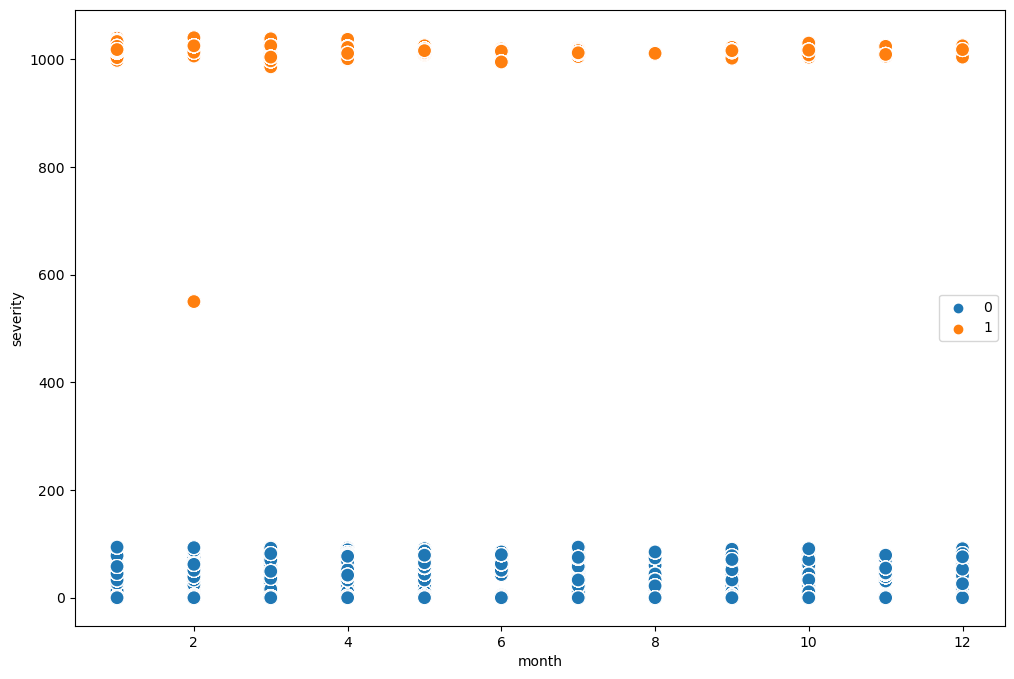

In [220]:
# Plot the clusters for the severity and month variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num_cleaned['month'], y=df_num_cleaned['severity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('month') # Label x-axis.
plt.ylabel('severity') # Label y-axis.
plt.show()

In [229]:
df_num_cleaned.loc[df_num_cleaned['clusters'] == 1, 'cluster'] = 'orange'
df_num_cleaned.loc[df_num_cleaned['clusters'] == 0, 'cluster'] = 'blue'

C:\Users\tiffk\AppData\Local\Temp\ipykernel_10508\157075582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_cleaned.loc[df_num_cleaned['clusters'] == 1, 'cluster'] = 'orange'


In [231]:
df_num_cleaned.groupby('cluster').agg({'precipitation':['mean', 'median'], 
                         'pressure':['mean', 'median'], 
                         'humidity':['mean', 'median'],
                          'severity':['mean', 'median']})

precipitation             pressure           humidity         \
                 mean  median         mean  median       mean median   
cluster                                                                
blue         0.002817  0.0010  1017.299894  1017.0  72.851792   75.0   
orange       0.003204  0.0006  1017.535361  1017.0  71.794064   75.0   

            severity          
                mean  median  
cluster                       
blue        5.130150     1.0  
orange   1015.652986  1017.0

# Notes

**I am still not really seeing any clear relationships as I have the data processed. This could be because one does not exist, or because it needs to be better divided to give a clearer picture of different conditions and symptom types. I am working on better mining of the strings in the conditions and symptoms**

**I will try to also divide the data as it is now into those reporting pain and comparing only severity reported. I think that the non pain reports are taking away from and skewing the analysis**

**I also am starting to look at the temporal and spatial relationships and if any weeks or months or years or locations had hot spots**

## Initial exploration of the relationship between time and symptoms and conditions 

C:\Users\tiffk\AppData\Local\Temp\ipykernel_10508\4230335003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_symptom_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])


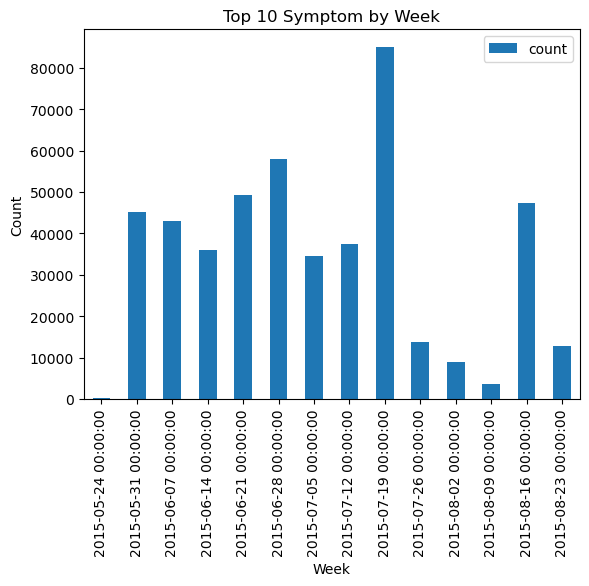

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [23]:
# Group data by check-in date and country, and count the occurrences of each condition
grouped_symptom_data = df_merged.groupby(['checkin_date', 'country', 'symptom']).size().reset_index(name='count')

# Find the 10 most common conditions
top_10_symptom = grouped_symptom_data.groupby('symptom')['count'].sum().nlargest(10).index

# Filter the data for the top 10 conditions
top_10_symptom_data = grouped_symptom_data[grouped_symptom_data['symptom'].isin(top_10_symptom)]

# Create a bar chart of the counts of the top 10 conditions by week
top_10_symptom_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])
top_10_symptom_data.set_index('checkin_date', inplace=True)
top_10_symptom_data.resample('W').sum().plot(kind='bar', stacked=True)
plt.title('Top 10 Symptom by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()

# Create a line chart of the counts of the top 10 conditions by month
top_10_data.resample('M').sum().plot(kind='line', marker='o')
plt.title('Top 10 Symptom by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

C:\Users\tiffk\AppData\Local\Temp\ipykernel_10508\4230335003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_symptom_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])


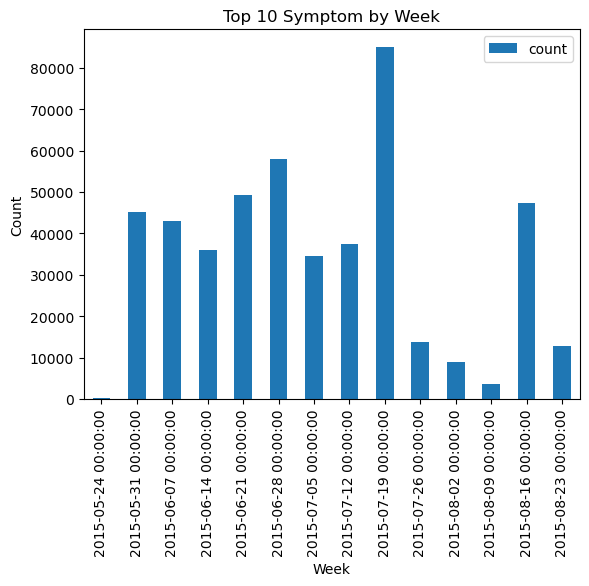

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [23]:
# Group data by check-in date and country, and count the occurrences of each condition
grouped_symptom_data = df_merged.groupby(['checkin_date', 'country', 'symptom']).size().reset_index(name='count')

# Find the 10 most common conditions
top_10_symptom = grouped_symptom_data.groupby('symptom')['count'].sum().nlargest(10).index

# Filter the data for the top 10 conditions
top_10_symptom_data = grouped_symptom_data[grouped_symptom_data['symptom'].isin(top_10_symptom)]

# Create a bar chart of the counts of the top 10 conditions by week
top_10_symptom_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])
top_10_symptom_data.set_index('checkin_date', inplace=True)
top_10_symptom_data.resample('W').sum().plot(kind='bar', stacked=True)
plt.title('Top 10 Symptom by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.show()

# Create a line chart of the counts of the top 10 conditions by month
top_10_data.resample('M').sum().plot(kind='line', marker='o')
plt.title('Top 10 Symptom by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

C:\Users\tiffk\AppData\Local\Temp\ipykernel_10508\2098595534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])


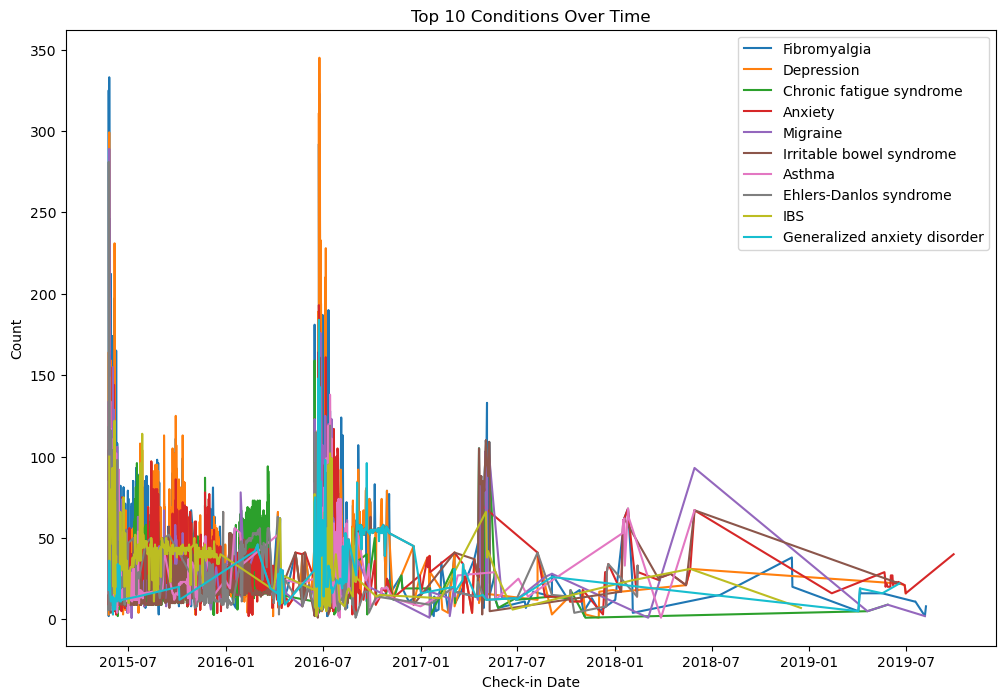

In [15]:
# Assuming you already have the grouped_data DataFrame from the previous example

# Find the top 10 conditions
top_10_conditions = grouped_data.groupby('condition')['count'].sum().nlargest(10).index

# Filter the data for the top 10 conditions
top_10_data = grouped_data[grouped_data['condition'].isin(top_10_conditions)]

# Convert check-in date to datetime
top_10_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])

# Create a line graph with a line for each of the top conditions over time
plt.figure(figsize=(12, 8))
for condition in top_10_conditions:
    condition_data = top_10_data[top_10_data['condition'] == condition]
    plt.plot(condition_data['checkin_date'], condition_data['count'], label=condition)

plt.title('Top 10 Conditions Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Count')
plt.legend()
plt.show()

C:\Users\tiffk\AppData\Local\Temp\ipykernel_10508\2098595534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])


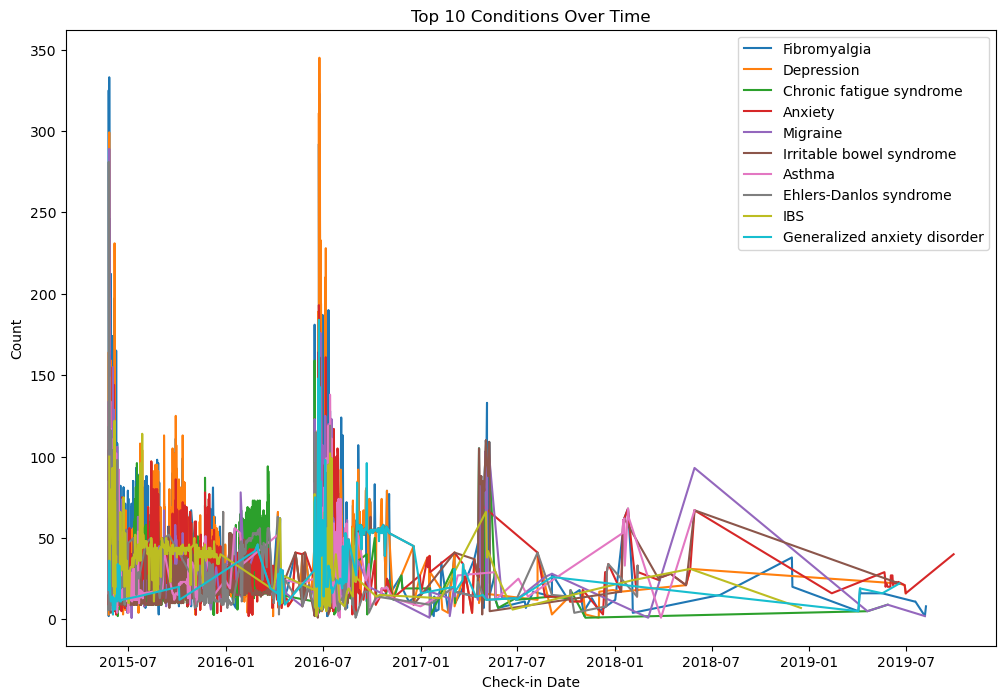

In [15]:
# Assuming you already have the grouped_data DataFrame from the previous example

# Find the top 10 conditions
top_10_conditions = grouped_data.groupby('condition')['count'].sum().nlargest(10).index

# Filter the data for the top 10 conditions
top_10_data = grouped_data[grouped_data['condition'].isin(top_10_conditions)]

# Convert check-in date to datetime
top_10_data['checkin_date'] = pd.to_datetime(top_10_data['checkin_date'])

# Create a line graph with a line for each of the top conditions over time
plt.figure(figsize=(12, 8))
for condition in top_10_conditions:
    condition_data = top_10_data[top_10_data['condition'] == condition]
    plt.plot(condition_data['checkin_date'], condition_data['count'], label=condition)

plt.title('Top 10 Conditions Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Count')
plt.legend()
plt.show()

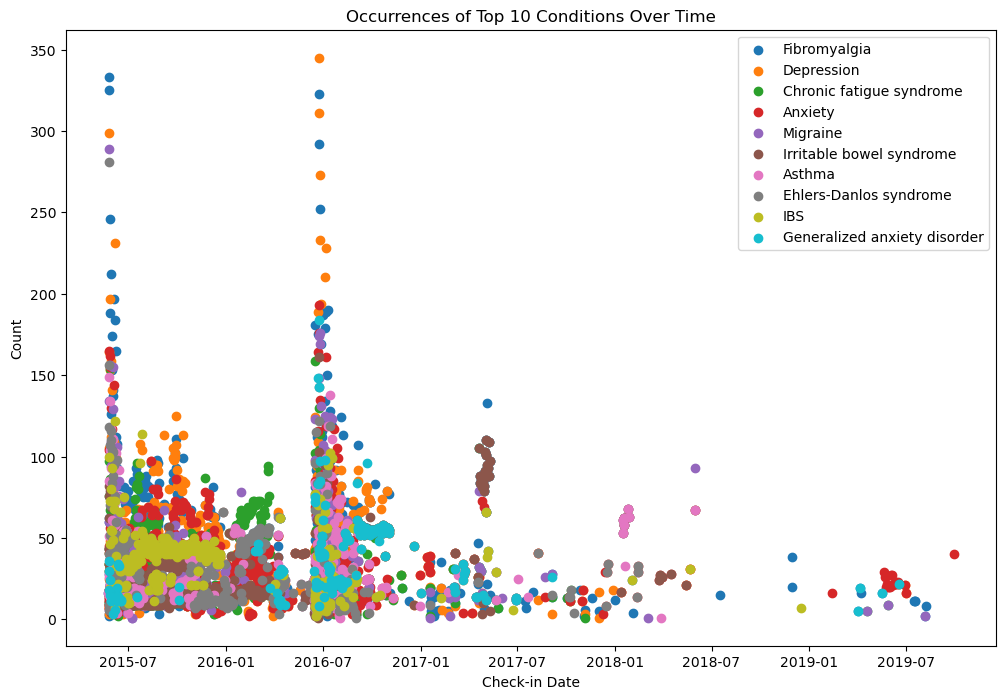

In [17]:

# Create a scatter plot with a point for each occurrence of the top conditions over time
plt.figure(figsize=(12, 8))
for condition in top_10_conditions:
    condition_data = top_10_data[top_10_data['condition'] == condition]
    plt.scatter(condition_data['checkin_date'], condition_data['count'], label=condition)

plt.title('Occurrences of Top 10 Conditions Over Time')
plt.xlabel('Check-in Date')
plt.ylabel('Count')
plt.legend()
plt.show()

## Hypothesis and notes from last time

**A note about bias first: I know that we were advised that choosing something that we had a personal connection to would help motivate us and give us better insights into the analysis, but I am finding that my experiences are introducing bias into my efforts. Even if my experiences are anecdotal when taken alone, I am trying to extrapolate up to the gloable experiences of pain. To an extent I feel like I  KNOW there is a relationship hidden in here, but I am beginning to realize it must be more multivariate**

**I predict that a relationship exists between precipitation/humidity/pressure and reported pain.**

**After running through this I realize I am neglecting possible seasonal experiences and I can evaluate these by breaking the checkin_date values into months and years. Anecdotal evidence would say that colder months cause certain types of pain to increase.**

**The users in the data are  predominately female and that could be because females are more susceptible to symptoms or are more likely to pay attention to and report health issues. As a control of sorts I could find another self reported data source related to physical welbbeing but not pain to see if there is a more balanced gender distribution.**

**Spoiler alert**, none of the relationships analysed showed a strong predicatble pattern that could be sussed out with linear regression. I think multivariate analysis would be better for this data